In [1]:
from singlequbit import *

In [2]:
omega = 1  # qubit level splitting
g = 0.2*omega  # qubit-TLS coupling
gamma = 0.05*omega  # TLS decay rate
N=0 # inverse bath temperature
T = 15 # final time
nt = 100 # number of time steps
lambdas=np.linspace(0.0005,0.005,3)#Number of lambdas to probe

In [3]:
import krotov 

In [4]:
tlist=np.linspace(0,15,1000)
nt=1000

In [8]:
def get_by_iter2(uno,iter):
    T=15
    EField=np.transpose(np.array(uno.all_pulses[iter]))
    EEnergy=np.zeros(len(tlist)-1)
    EEnergy[0]=(np.square(EField[0]))*(T/nt)
    a=0
    for i in range (1,nt-1):
        a+=np.square(EField[i-1])
    EEnergy[i]=(np.square(EField[i])+a)*(T/nt)
    return EEnergy

In [6]:
import matplotlib.pyplot as plt
import glob

In [7]:
files=glob.glob("/home/mcditos/krotov/Mixed/Linear/results_single/*")

In [9]:
rho_th = qutip.Qobj(qutip.tensor(qutip.Qobj(np.diag([1,0])), qutip.Qobj(np.diag([1,0]))))
rho_q_trg = qutip.Qobj(np.diag([1, 0]))
rho_T_trg = qutip.Qobj(np.diag([0, 1]))
rho_trg = qutip.tensor(rho_q_trg, rho_T_trg)

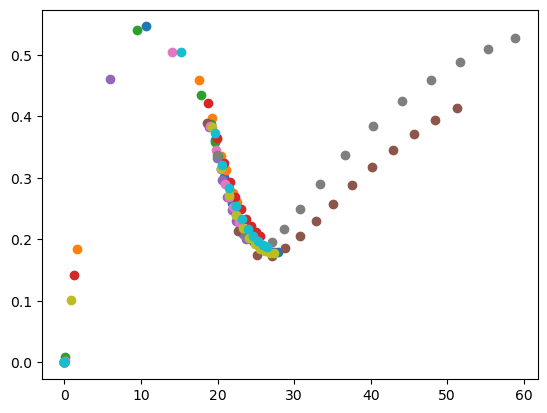

In [43]:
for j in (1,10,20,30,40,50,60,70,80,90):
    energy_1=[]
    fidelities_1=[]
    iteration=[]
    uno=krotov.result.Result.load(files[j])
    iters=uno.iters[-1]
    iters=np.linspace(0,iters,15)
    for i in iters:
        energy_1.append(get_by_iter2(uno,int(i))[-1])
        fidelities_1.append(fidelity(get_by_iter(uno,int(i)),rho_trg))
    plt.scatter(energy_1,np.real(fidelities_1))
plt.show()
    

In [44]:
uno

Krotov Optimization Result
--------------------------
- Started at 2023-08-01 17:56:45
- Number of objectives: 1
- Number of iterations: 1661
- Reason for termination: Reached convergence: Loss of monotonic convergence; error decrease < 0
- Ended at 2023-08-01 18:43:43 (0:46:58)

In [46]:
omega = 1  # qubit level splitting
g = 0.2*omega  # qubit-TLS coupling
gamma = 0.05*omega  # TLS decay rate
N=0 # inverse bath temperature
T = 15 # final time
nt = 1000 # number of time steps
result=singlequbit_opt(omega, g, gamma, 0, rho_th, rho_trg, nt, 5, T)


Iteration 0
    objectives:
        1:ρ₀[2⊗2,2⊗2] to ρ₁[2⊗2,2⊗2] via [𝓛₀[[2⊗2,2⊗2],[2⊗2,2⊗2]], [𝓛₁[[2⊗2,2⊗2],[2⊗2,2⊗2]], u₁(t)]]
    adjoint objectives:
        1:ρ₂[2⊗2,2⊗2] to ρ₃[2⊗2,2⊗2] via [𝓛₂[[2⊗2,2⊗2],[2⊗2,2⊗2]], [𝓛₃[[2⊗2,2⊗2],[2⊗2,2⊗2]], u₁(t)]]
    chi_constructor: chis_qubit
    mu: derivative_wrt_pulse
    S(t) (ranges): [0.000000, 1.000000]
    iter_start: 0
    iter_stop: 100000
    duration: 0.1 secs (started at 2023-08-02 01:14:06)
    optimized pulses (ranges): [0.00, 0.00]
    ∫gₐ(t)dt: 0.00e+00
    λₐ: 5.00e+00
    storage (bw, fw, fw0): None, None, None
    fw_states_T norm: 1.000000
    τ: (0.00e+00:0.00π)
    qubit error: 1.0e+00
Iteration 1
    duration: 0.7 secs (started at 2023-08-02 01:14:06)
    optimized pulses (ranges): [-0.00, 0.00]
    ∫gₐ(t)dt: 4.54e-23
    λₐ: 5.00e+00
    storage (bw, fw, fw0): [1 * ndarray(1000)] (0.7 MB), None, None
    fw_states_T norm: 1.000000
    τ: (0.00e+00:0.00π)
    qubit error: 1.0e+00
Iteration 2
    duration: 0.7 secs (star

In [48]:
result.iters[-1]

1730

In [50]:
get_by_iter(result,1730)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.05378651+0.j         0.03263615+0.05164301j 0.00888937+0.00646628j
  0.04563197+0.02730842j]
 [0.03263615-0.05164301j 0.18369664+0.j         0.00516233+0.00143498j
  0.14647354-0.17520519j]
 [0.00888937-0.00646628j 0.00516233-0.00143498j 0.03158332+0.j
  0.02994875+0.02907801j]
 [0.04563197-0.02730842j 0.14647354+0.17520519j 0.02994875-0.02907801j
  0.73093352+0.j        ]]

In [51]:
fidelity(get_by_iter(result,1730),rho_trg)

(0.18378443079196937922+7.518168281799595224e-06j)

In [52]:
def trace_A(rho):
    """Partial trace over the A degrees of freedom"""
    rho_q = np.zeros(shape=(2, 2), dtype=np.complex_)
    rho_q[0, 0] = rho[0, 0] + rho[2, 2]
    rho_q[0, 1] = rho[0, 1] + rho[2, 3]
    rho_q[1, 0] = rho[1, 0] + rho[3, 2]
    rho_q[1, 1] = rho[1, 1] + rho[3, 3]
    return qutip.Qobj(rho_q)

In [55]:
fidelity(trace_A(get_by_iter(result,1730)),rho_T_trg)

(0.9146850037580489269-5.3554102661236481715e-07j)